# Estruturas Criptográficas - Criptografia e Segurança da Informação

[Grupo 03](https://paper.dropbox.com/doc/Estruturas-Criptograficas-2023-2024-Trabalhos-Praticos-8WcsdZARGLv0nXS9KasmK)

(PG54177) Ricardo Alves Oliveira 

(PG54236) Simão Oliveira Alvim Barroso

## TP2 - Exercício 2

2. Uma das aplicações mais importantes do teorema chinês dos restos (CRT) em criptografia é a transformada NTT “Number Theoretic Transform”.  Esta transformada é uma componente importantes de “standards” PQC  como o Kyber e o Dilithium mas também de outros algoritmos submetidos ao concurso NIST PQC.  
A transformação NTT tem várias opções e aquela que está apresentada no +Capítulo 4:  Problemas Difíceis  usa o CRT.
Neste problema pretende-se uma implementação Sagemath  do NTT-CRT tal como é descrito nesse documento.

## Resolução

Para resolver este exercício comecamos por instalar e importar o SageMath. 

In [1]:
from sage.all import *
import random

A função find_q(n) tem como objetivo encontrar um número primo que satisfaça a condição q≡1mod(2N), onde N pertence a [32, 64, 128, 256, 512, 1024, 2048].

In [2]:
def find_q(n):
    if not  n in [32,64,128,256,512,1024,2048]:
        raise ValueError("improper argument ",n)
        
    q = 1 + 2*n
    while True:
        if (q).is_prime():
            return q
        q += 2*n
    

De seguida implementamos a função NTT que recebe como argumentos:

- f: Polinómio de entrada
- N: Tamanho do polinómio
- xi: Raiz primitiva de N
- F: Campo finito onde serão realizadas as operações

Esta função devolve o polinómio transformado de acordo com a transformada NTT. Para tal foram implementadas as seguintes funções auxiliares:

- \_expand\_: Esta função recebe um polinómio e um tamanho N e devolve um polinómio de tamanho N com os coeficientes do polinómio de entrada e os restantes coeficientes a 0.
- \_ntt\_: Esta função recebe um polinómio de entrada e devolve o polinómio transformado de acordo com a transformada NTT.

Por fim, a implementação da transformada segue o algoritmo descrito no [Capítulo 4](https://paper.dropbox.com/doc/Estruturas-Criptograficas-2023-2024-SUMARIO-UoGN1qanDMVYkNV8D5avY).

In [3]:
def ntt(f,N,xi,F):                            
    def _expand_(f): 
        u = f.list()
        return u + [0]*(N-len(u)) 
    
    def _ntt_(xi,N,f):
        if N==1:
            return f
        N_ = N/2 ; xi2 =  xi^2  
        f0 = [f[2*i]   for i in range(N_)] ; f1 = [f[2*i+1] for i in range(N_)] 
        ff0 = _ntt_(xi2,N_,f0) ; ff1 = _ntt_(xi2,N_,f1)  

        s  = xi ; ff = [F(0) for i in range(N)] 
        for i in range(N_):
            a = ff0[i] ; b = s*ff1[i]  
            ff[i] = a + b ; ff[i + N_] = a - b 
            s = s * xi2                     
        return ff 
    
    return _ntt_(xi,N,_expand_(f))

Para o cálculo da inversa da transformada NTT foi implementada a função ntt_inv que ao receber o polinómio transformado, o tamanho do polinómio e o array de bases do crt, devolve o polinómio original.

In [4]:
def ntt_inv(ff,N,base):                             
    return sum([ff[i]*base[i] for i in range(N)])

A função auxiliar random_pol e responsável por gerar um polinómio aleatório a partir de um anel polinomial R. 

In [5]:
def random_pol(R,args=None):
    return R.random_element(args)

Para testar a implementação precisamos agora de obter o N desejado e gerar o q correspondente, com recurso à função find_q(n) mencionada anteriormente. 

In [6]:
N = int(input("Enter N: "))
q = find_q(N)
print("q = ",q)


q =  12289


Com as variáveis de entrada defenidas podemos agora definir:

- O campo finito F
- O anel polinomial R com base no campo finito F
- O gerador do anel de polinômios R, representado por w
- O polinómio g, utilizado para encontrar as raízes primitivas
- As raízes primitivas xi
- As raízes rs que são geradas segundo a forma `xi^(2i+1)`
- A base do CRT calculada através da função `crt_basis`

In [7]:
F = FiniteField(q)   
R = PolynomialRing(F, name="w")
w = R.gen()
g = (w^N + 1)
xi = g.roots(multiplicities=False)[-1]
rs = [xi^(2*i+1) for i in range(N)] 
base = crt_basis([(w - r) for r in rs]) 

## Testes

Com as variáveis definidas podemos agora testar a implementação da transformada NTT e da sua inversa. Para tal, geramos um polinómio aleatório de tamanho entre 1 e N-1.

In [8]:
f = random_pol(R,N-random.randint(1,N-1))
print("f = ",end='')
for i in range(N-1):
    print(f"{f[i]}*w^{i} + ",end='')
print(f"{f[N-1]}*w^{N-1}")

f = 2985*w^0 + 10539*w^1 + 2837*w^2 + 728*w^3 + 917*w^4 + 3665*w^5 + 3724*w^6 + 4560*w^7 + 1125*w^8 + 939*w^9 + 5063*w^10 + 8343*w^11 + 9392*w^12 + 4593*w^13 + 8260*w^14 + 10329*w^15 + 3523*w^16 + 10935*w^17 + 5634*w^18 + 9333*w^19 + 9175*w^20 + 5411*w^21 + 7285*w^22 + 7498*w^23 + 1579*w^24 + 2717*w^25 + 11477*w^26 + 2852*w^27 + 763*w^28 + 3609*w^29 + 3373*w^30 + 11084*w^31 + 5907*w^32 + 12161*w^33 + 7957*w^34 + 8969*w^35 + 10227*w^36 + 5757*w^37 + 9378*w^38 + 11352*w^39 + 4113*w^40 + 136*w^41 + 3088*w^42 + 2100*w^43 + 12115*w^44 + 10175*w^45 + 9557*w^46 + 6705*w^47 + 8583*w^48 + 687*w^49 + 7063*w^50 + 1903*w^51 + 6148*w^52 + 5388*w^53 + 10156*w^54 + 11243*w^55 + 2336*w^56 + 5098*w^57 + 5700*w^58 + 12257*w^59 + 2567*w^60 + 2552*w^61 + 4659*w^62 + 9796*w^63 + 3425*w^64 + 5004*w^65 + 2999*w^66 + 7173*w^67 + 8152*w^68 + 4002*w^69 + 11856*w^70 + 2106*w^71 + 2163*w^72 + 9586*w^73 + 6891*w^74 + 11695*w^75 + 8203*w^76 + 5299*w^77 + 12069*w^78 + 1717*w^79 + 10452*w^80 + 3313*w^81 + 390*w^82 + 

De seguida calculamos o polinómio transformado através da função NTT.

In [9]:
ff = ntt(f,N,xi,F)
print("ff = ",end='')
for i in range(N-1):
    print(f"{ff[i]}*w^{i} + ",end='')
print(f"{ff[N-1]}*w^{N-1}")

ff = 4169*w^0 + 531*w^1 + 12126*w^2 + 10913*w^3 + 4137*w^4 + 1774*w^5 + 10884*w^6 + 1324*w^7 + 10774*w^8 + 12067*w^9 + 8936*w^10 + 11542*w^11 + 2456*w^12 + 3749*w^13 + 9328*w^14 + 657*w^15 + 3105*w^16 + 6472*w^17 + 4180*w^18 + 10751*w^19 + 10651*w^20 + 11180*w^21 + 10068*w^22 + 9229*w^23 + 10322*w^24 + 8704*w^25 + 971*w^26 + 4749*w^27 + 922*w^28 + 11833*w^29 + 5557*w^30 + 10396*w^31 + 7588*w^32 + 4966*w^33 + 1132*w^34 + 6611*w^35 + 3614*w^36 + 4626*w^37 + 11609*w^38 + 1129*w^39 + 2757*w^40 + 8157*w^41 + 8800*w^42 + 9249*w^43 + 3400*w^44 + 10067*w^45 + 11000*w^46 + 1667*w^47 + 7075*w^48 + 2279*w^49 + 7771*w^50 + 1600*w^51 + 3791*w^52 + 5925*w^53 + 2754*w^54 + 1055*w^55 + 2833*w^56 + 8684*w^57 + 8059*w^58 + 3996*w^59 + 10456*w^60 + 9371*w^61 + 2738*w^62 + 8962*w^63 + 3925*w^64 + 8480*w^65 + 2032*w^66 + 1444*w^67 + 5126*w^68 + 35*w^69 + 5691*w^70 + 3861*w^71 + 1993*w^72 + 3736*w^73 + 952*w^74 + 8409*w^75 + 296*w^76 + 1848*w^77 + 2011*w^78 + 2664*w^79 + 522*w^80 + 10136*w^81 + 9448*w^82 + 

Por fim calculamos o polinómio original através da função ntt_inv, utilizando para isso o polinómio transformado, o tamanho do polinómio e o array de bases do crt.

Para verificar fazemos a comparação entre o polinómio original e o polinómio obtido através da inversa da transformada NTT do polinómio transformado.

In [10]:

fff = ntt_inv(ff,N,base)
print("fff = ",end='')
for i in range(N-1):
    print(f"{fff[i]}*w^{i} + ",end='')
print(f"{fff[N-1]}*w^{N-1}")

print("Correto ? ",f == fff) 

fff = 2985*w^0 + 10539*w^1 + 2837*w^2 + 728*w^3 + 917*w^4 + 3665*w^5 + 3724*w^6 + 4560*w^7 + 1125*w^8 + 939*w^9 + 5063*w^10 + 8343*w^11 + 9392*w^12 + 4593*w^13 + 8260*w^14 + 10329*w^15 + 3523*w^16 + 10935*w^17 + 5634*w^18 + 9333*w^19 + 9175*w^20 + 5411*w^21 + 7285*w^22 + 7498*w^23 + 1579*w^24 + 2717*w^25 + 11477*w^26 + 2852*w^27 + 763*w^28 + 3609*w^29 + 3373*w^30 + 11084*w^31 + 5907*w^32 + 12161*w^33 + 7957*w^34 + 8969*w^35 + 10227*w^36 + 5757*w^37 + 9378*w^38 + 11352*w^39 + 4113*w^40 + 136*w^41 + 3088*w^42 + 2100*w^43 + 12115*w^44 + 10175*w^45 + 9557*w^46 + 6705*w^47 + 8583*w^48 + 687*w^49 + 7063*w^50 + 1903*w^51 + 6148*w^52 + 5388*w^53 + 10156*w^54 + 11243*w^55 + 2336*w^56 + 5098*w^57 + 5700*w^58 + 12257*w^59 + 2567*w^60 + 2552*w^61 + 4659*w^62 + 9796*w^63 + 3425*w^64 + 5004*w^65 + 2999*w^66 + 7173*w^67 + 8152*w^68 + 4002*w^69 + 11856*w^70 + 2106*w^71 + 2163*w^72 + 9586*w^73 + 6891*w^74 + 11695*w^75 + 8203*w^76 + 5299*w^77 + 12069*w^78 + 1717*w^79 + 10452*w^80 + 3313*w^81 + 390*w^82 

### Testes de Performance

Para testar a performance da implementação da transformada NTT e da sua inversa, geramos 100 polinómios de tamanho aleatório entre 1 e N-1 e calculamos o tempo médio de execução da transformada, da sua inversa e do setup necessário para a execução da transformada. Este processo foi realizado para os valores de N: 32, 64, 128, 256, 512, 1024, 2048.

In [ ]:
import time

avarage_setup_times = []
avarage_ntt_times = []
avarage_inv_times = []

for i in [32,64,128,256,512,1024,2048]:
    times_ntt = []
    times_inv = []
    time_start = time.time()
    correct = 0

    q = find_q(i)
    F = FiniteField(q)   
    R = PolynomialRing(F, name="w")
    w = R.gen()
    g = (w^i + 1)
    xi = g.roots(multiplicities=False)[-1]
    rs = [xi^(2*j+1) for j in range(i)] 
    base = crt_basis([(w - r) for r in rs]) 
    
    time_end = time.time()
    setup_time = time_end-time_start
    avarage_setup_times.append(setup_time)

    print(f'''Vars:
n = {i}
q = {q}

Polynomials:''')
    
    for _ in range(100):
        f = random_pol(R,i-random.randint(1,i-1))
        print("f = ",f)
    
        time_start = time.time()
        ff = ntt(f,i,xi,F)
        time_end = time.time()
        times_ntt.append(time_end-time_start)
    
        time_start = time.time()
        fff = ntt_inv(ff,i,base)
        time_end = time.time()
        times_inv.append(time_end-time_start)

        correct += f == fff
    
    avrg_ntt = sum(times_ntt)/len(times_ntt)
    avarage_ntt_times.append(avrg_ntt)
    avrg_inv = sum(times_inv)/len(times_inv)
    avarage_inv_times.append(avrg_inv)

    print(f'''
Results:
Setup Time: {setup_time}
Avarage NTT Time: {avrg_ntt}
Avarage Inv Time: {avrg_inv}
Correct: {correct}/100
''')

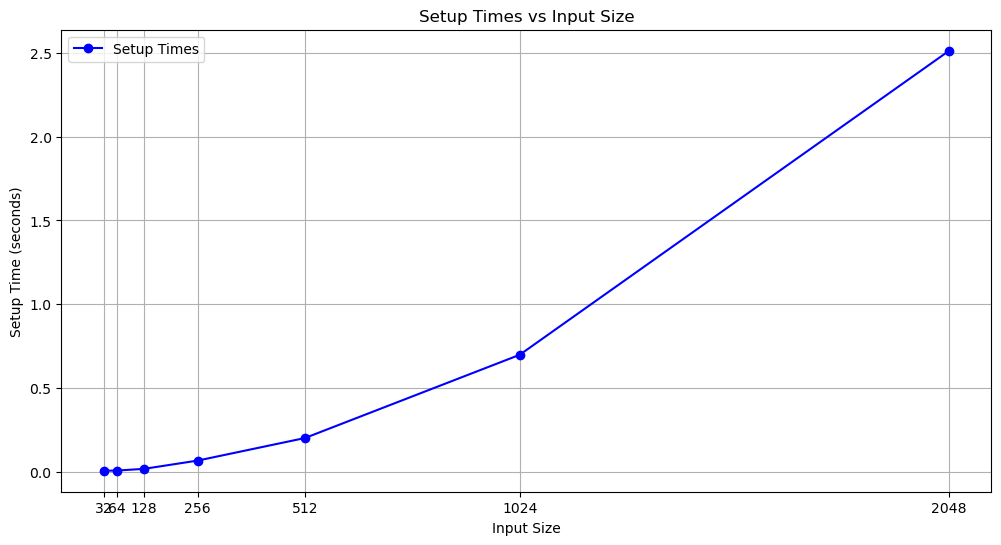

In [40]:
import matplotlib.pyplot as plt

input_sizes = [32, 64, 128, 256, 512, 1024, 2048]

plt.figure(figsize=(12, 6))
plt.plot(input_sizes, avarage_setup_times, marker='o', color='b', label='Setup Times')
plt.title('Setup Times vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Setup Time (seconds)')
plt.xticks(input_sizes)  
plt.grid(True)
plt.legend()
plt.show()

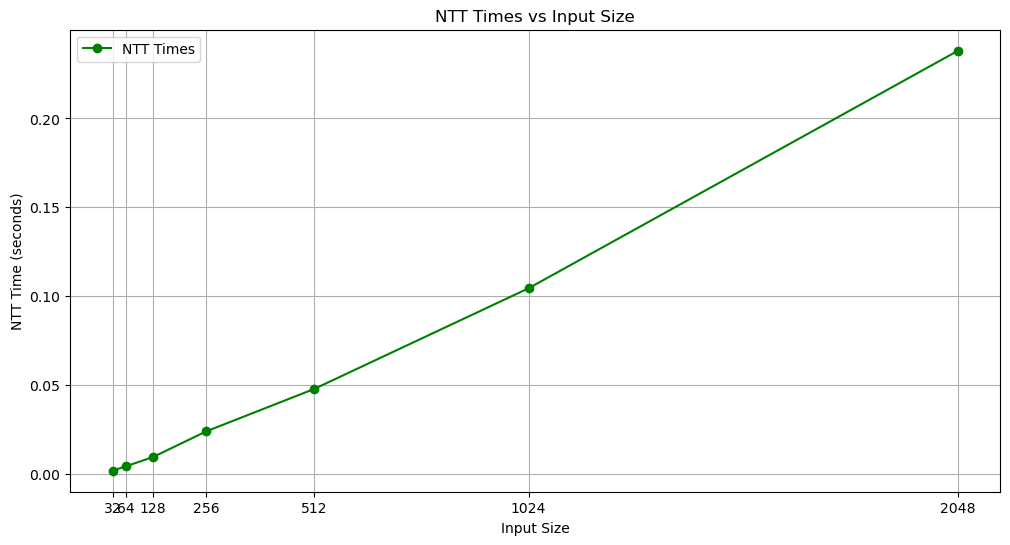

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, avarage_ntt_times , marker='o', color='g', label='NTT Times')
plt.title('NTT Times vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('NTT Time (seconds)')
plt.xticks(input_sizes)  
plt.grid(True)
plt.legend()
plt.show()

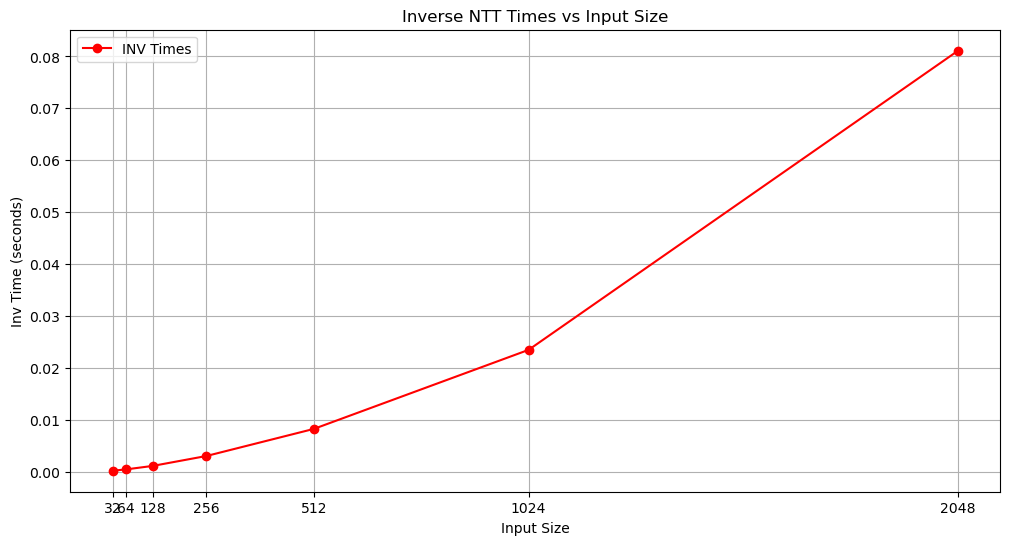

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, avarage_inv_times , marker='o', color='r', label='INV Times')
plt.title('Inverse NTT Times vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Inv Time (seconds)')
plt.xticks(input_sizes)  
plt.grid(True)
plt.legend()
plt.show()

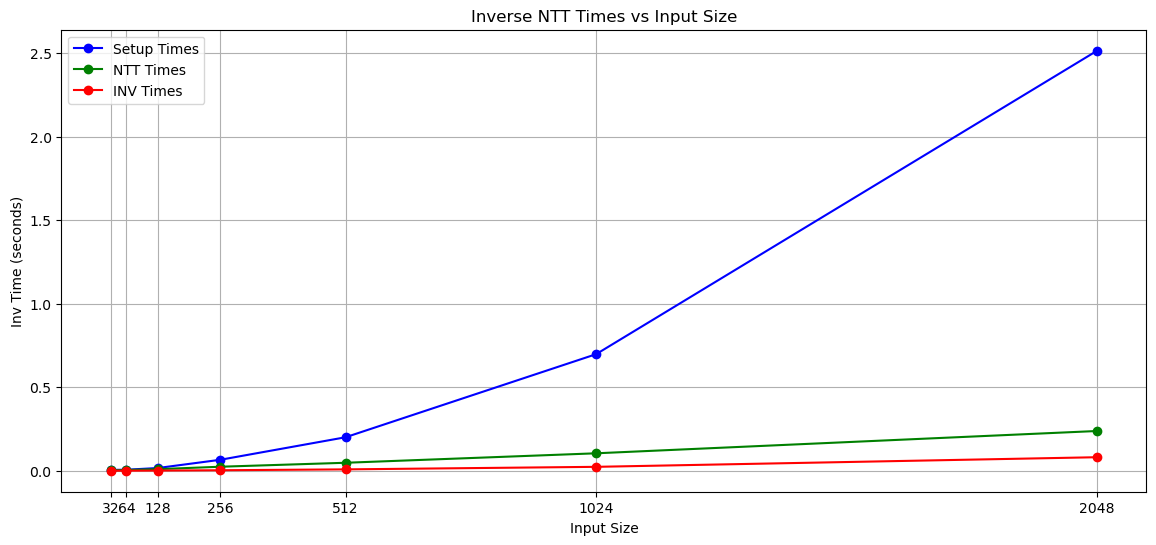

In [44]:
plt.figure(figsize=(14, 6))
plt.plot(input_sizes, avarage_setup_times, marker='o', color='b', label='Setup Times')
plt.plot(input_sizes, avarage_ntt_times , marker='o', color='g', label='NTT Times')
plt.plot(input_sizes, avarage_inv_times , marker='o', color='r', label='INV Times')
plt.title('Inverse NTT Times vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Inv Time (seconds)')
plt.xticks(input_sizes)  
plt.grid(True)
plt.legend()
plt.show()